In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from functools import reduce

%matplotlib inline
plt.style.use('seaborn-deep')
pd.options.display.float_format = "{:,.2f}".format

In [3]:
stock_data = pd.read_csv("Data/RealData/hfq/000001.csv", dtype={"code": str})

In [4]:
stock_data.describe()

,open,close,high,low,volume,amount,amplitude,pctChg,priceChg,turn
count,"7,556.00","7,556.00","7,556.00","7,556.00","7,556.00","7,556.00","7,556.00","7,556.00","7,556.00","7,556.00"
mean,988.25,989.03,"1,004.48",973.50,"409,241.22","610,217,085.83",3.24,0.09,0.28,0.96
std,869.44,870.20,882.78,856.48,"569,904.11","853,200,546.80",2.24,2.73,30.65,1.15
min,25.23,25.23,25.51,24.69,1.00,"3,000.00",0.00,-29.53,-251.92,0.00
25%,321.73,321.30,328.80,316.23,"35,102.75","45,851,750.00",1.82,-1.21,-7.37,0.33
50%,725.94,728.23,739.43,715.73,"181,900.00","287,626,416.00",2.64,-0.08,-0.23,0.59
75%,"1,497.37","1,499.46","1,512.54","1,481.11","576,617.25","842,559,184.00",4.02,1.08,6.50,1.16
max,"4,217.41","4,233.66","4,258.04","4,154.02","5,086,050.00","8,596,942,080.00",27.96,39.97,276.30,19.51


In [5]:
stock_price = stock_data[['date','close']]
stock_price.columns = ['ds', 'y']
stock_price.head(10)

,ds,y
0,1991-04-03,49.00
1,1991-04-04,48.76
2,1991-04-05,48.52
3,1991-04-06,48.28
4,1991-04-08,48.04
5,1991-04-09,47.80
6,1991-04-10,47.56
7,1991-04-12,47.08
8,1991-04-13,46.84
9,1991-04-16,46.38


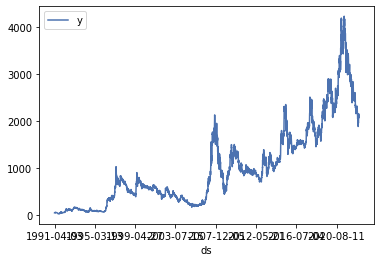

In [6]:
plt.show(stock_price.plot(x='ds', y='y'))

In [7]:
model = Prophet()
model.fit(stock_price)

21:16:25 - cmdstanpy - INFO - Chain [1] start processing
21:16:30 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = model.make_future_dataframe(200,freq='d')

future_boolean = future['ds'].map(lambda x : True if x.weekday() in range(0, 5) else False)
future = future[future_boolean] 

In [15]:
future.tail()

,ds
7749,2023-06-06
7750,2023-06-07
7751,2023-06-08
7752,2023-06-09
7755,2023-06-12


In [16]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
7653,2023-06-06,"3,302.20","2,964.95","3,633.32","3,288.91","3,311.62",9.05,9.05,9.05,-0.32,-0.32,-0.32,9.38,9.38,9.38,0.00,0.00,0.00,"3,311.26"
7654,2023-06-07,"3,302.90","2,948.04","3,646.99","3,289.38","3,312.61",8.62,8.62,8.62,0.65,0.65,0.65,7.97,7.97,7.97,0.00,0.00,0.00,"3,311.52"
7655,2023-06-08,"3,303.60","2,942.56","3,664.97","3,289.73","3,313.56",7.20,7.20,7.20,0.66,0.66,0.66,6.55,6.55,6.55,0.00,0.00,0.00,"3,310.80"
7656,2023-06-09,"3,304.30","2,945.78","3,617.61","3,290.13","3,314.37",5.31,5.31,5.31,0.18,0.18,0.18,5.12,5.12,5.12,0.00,0.00,0.00,"3,309.60"
7657,2023-06-12,"3,306.39","2,944.30","3,658.67","3,292.02","3,316.58",1.02,1.02,1.02,-0.11,-0.11,-0.11,1.13,1.13,1.13,0.00,0.00,0.00,"3,307.41"


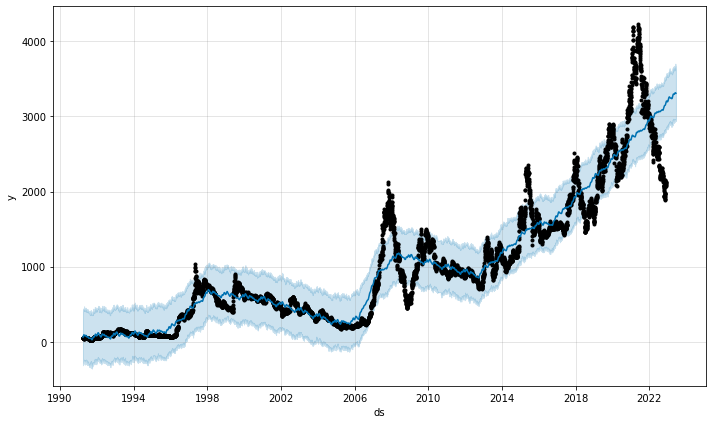

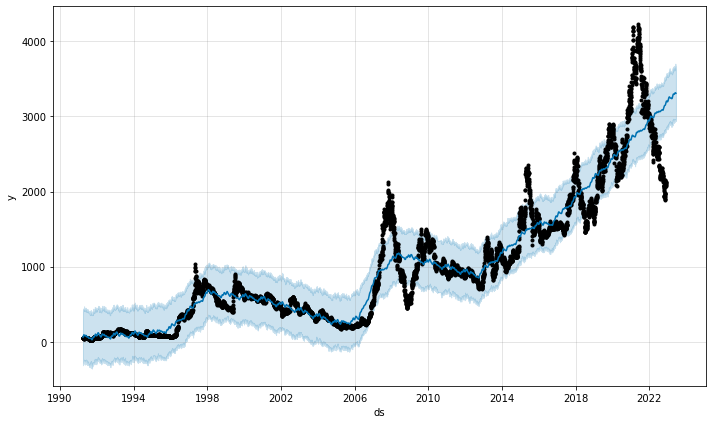

In [18]:
model.plot(forecast)

In [22]:
stock_price_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
df = pd.merge(stock_price, stock_price_forecast, on='ds', how='right')
# df.set_index('ds').plot(figsize=(16,8), color=['royalblue', "#34495e", "#e74c3c", "#e74c3c"], grid=True);

KeyError: 'ds'